In [1]:
from scipy.ndimage.filters import gaussian_filter 

In [2]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
g = np.zeros((55, 55))
g[27, 27] = 1

In [28]:
def scipy_gaussian_mask(size):
    sigma = (size//3)
    shape = 5 * sigma * 2
    if shape % 2 == 0:
        shape += 1
    g = np.zeros((shape, shape))
    g[shape//2, shape//2] = 1
    return gaussian_filter(g, sigma)

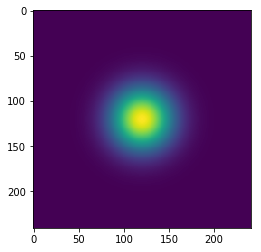

In [29]:
plt.imshow(scipy_gaussian_mask(72))

In [15]:
def gaussian2d(x, y, sx=1, sy=1, x0=0, y0=0, A=1):
    sxx = 2 * sx * sx
    syy = 2 * sy * sy
    xc = x - x0
    yc = y - y0
    xcc = xc * xc
    ycc = yc * yc
    return A * np.exp(-(xcc/sxx + ycc/syy))

In [21]:
def mask_gaussian(size):
    sigma = size // 3  # 97% of the gaussian in the size * size square
    half = int((sigma * 5 ))  # to be sure that the limit of the mask have a value close to 0 (avoid artifact on density map)
    im = np.zeros((2 * half + 1, 2 * half + 1), np.float32)
    for y in range(-half, half + 1):
        for x in range(-half, half + 1):
            im[y + half, x + half] = gaussian2d(x, y, sigma, sigma, 0, 0, 1)
    total_sum = np.sum(im)
    im /= total_sum
    return im

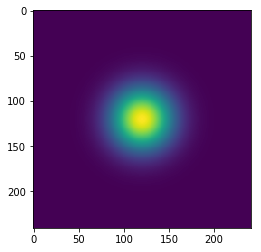

In [32]:
plt.imshow(mask_gaussian(72))

In [33]:
np.sum(np.abs((mask_gaussian(72) - scipy_gaussian_mask(72))))

0.00022950625865809839

In [34]:
%timeit mask_gaussian(72)

10 loops, best of 3: 85 ms per loop


In [35]:
%timeit scipy_gaussian_mask(72)

100 loops, best of 3: 11.8 ms per loop


In [37]:
def test(sigma):
    shape = 100
    if shape % 2 == 0:
        shape += 1
    g = np.zeros((shape, shape))
    g[shape//2, shape//2] = 1
    return gaussian_filter(g, sigma)

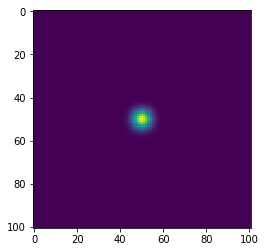

In [38]:
plt.imshow(test(3))

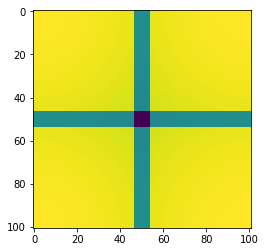

In [49]:
plt.imshow(test(1110))

In [47]:
w = 25
g = test(10)
np.sum(g[51-w: 51+w+1, 51-w:51+w+1])

0.97795536414868778